# Investigating Netflix Movies : Exploratory Data Analysis (EDA)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## DataSet Overview
The dataset includes the following key columns:

| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [3]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("./dataset/netflix_data.csv")

In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
1,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
2,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
3,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
4,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,1,A genetics professor experiments with a treatm...,International TV


In [6]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


In [7]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
duration        0
description     0
genre           0
dtype: int64

In [8]:
netflix_df.describe()

,release_year,duration
count,4812.000000,4812.000000
mean,2012.711554,99.566708
std,9.517978,30.889305
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,99.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'duration'}>]], dtype=object)

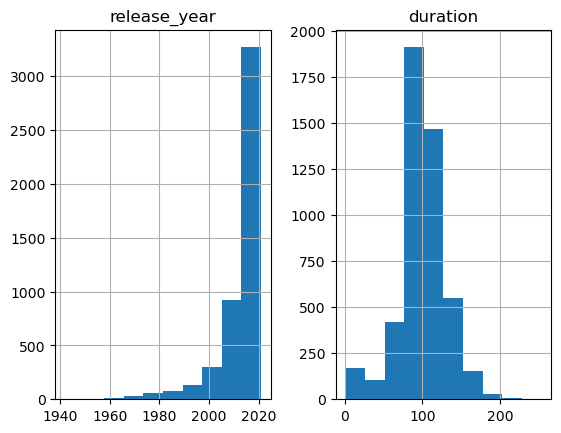

In [9]:
netflix_df.hist()

In [10]:
netflix_df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812,4812
unique,4812,2,4812,3615,4690,72,1292,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",A scheming matriarch plots to cut off her disa...,Dramas
freq,1,4677,1,18,10,1886,100,2,1343


## Data Analysis Preview

In [12]:
# What were the most common movie durations during the 1990s?
# Filter the DataSet to get only the 1990s movies
movies_1990s_df = netflix_df.query("release_year >= 1990 & release_year < 2000")
movies_1990s = movies_1990s_df[['title','duration']]

# Find the most frequent duration (mode)
duration = int(movies_1990s['duration'].mode()[0])

print(f"The most frequent movie duration in the 1990s is: {duration} minutes.")

The most frequent movie duration in the 1990s is: 94 minutes.


In [31]:
# Number of short action movies released in the 1990s (duration < 90 minutes)?

# Filter the DataSet to get only the 1990s movies and genre = 'Action'
short_action_movies_1990s_df = netflix_df.query("(release_year >= 1990 & release_year < 2000) & genre == 'Action' & duration < 90")

# Count the number of short action movies released in the 1990s
short_movie_count = short_action_movies_1990s_df['duration'].count()

print(f"Number of short 'action' movies released in the 1990s: {short_movie_count}")

Number of short 'action' movies released in the 1990s: 7


Top 5 genres with the most movies in the 1990s:
genre
Action            48
Dramas            44
Comedies          40
Children          15
Classic Movies    15
Name: count, dtype: int64


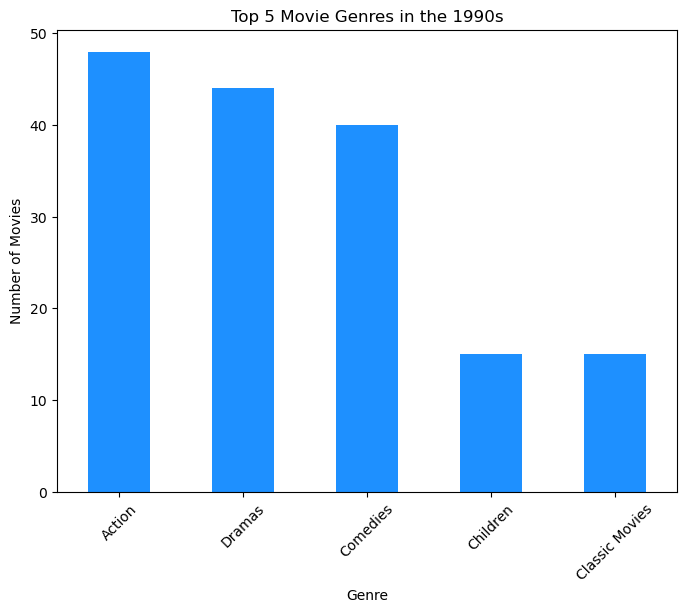

In [39]:
# Which genres dominated the decade (1990s) on Netflix?
movies_1990s_df
# Filter genres with sufficient representation to avoid outliers
top_5_genres = movies_1990s_df['genre'].value_counts().head(5)

print("Top 5 genres with the most movies in the 1990s:")
print(top_5_genres)

# Plotting the top 5 genres
plt.figure(figsize=(8, 6))
top_5_genres.plot(kind='bar', color='dodgerblue')
plt.title('Top 5 Movie Genres in the 1990s')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

Content Quantity Across Decades:


release_year
1940       5
1950      11
1960      20
1970      60
1980      95
1990     184
2000     593
2010    3461
2020     383
Name: title, dtype: int64

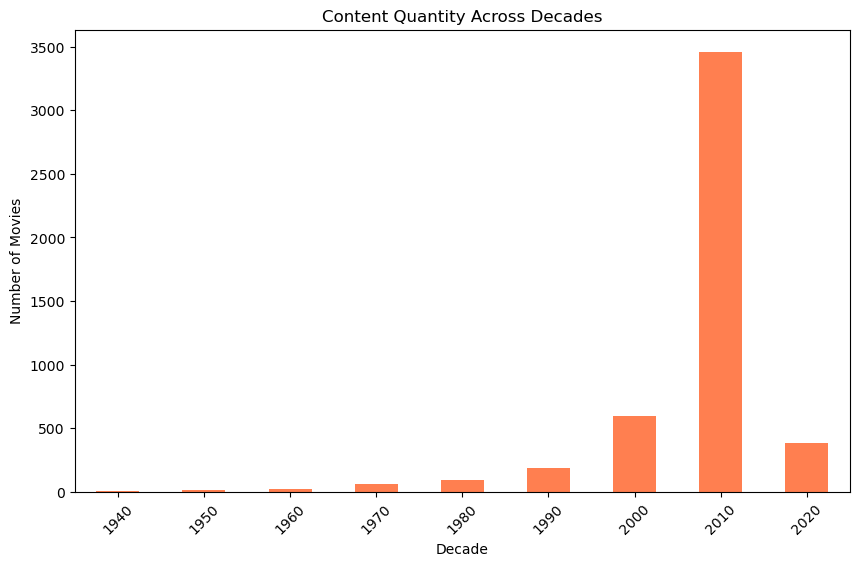

In [51]:
# How did the 1990s compare to other decades in terms of content quantity and diversity?
# Compare content quantity across decades using a bar plot
decades = (netflix_df['release_year'] // 10) * 10 # Analyze content quantity per decade (split into 10-year periods)
content_per_decade = netflix_df.groupby(decades)['title'].count()

print('Content Quantity Across Decades:') 
display(content_per_decade)

plt.figure(figsize=(10, 6))
content_per_decade.plot(kind='bar', color='coral', title='Content Quantity Across Decades')
plt.xlabel('Decade')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

## Analysis of Netflix Movie Trends in the 1990s and Beyond
### What were the most common movie durations during the 1990s?
The 1990s were a notable decade for movie production, particularly in terms of variety and duration trends. The most frequent movie duration during this period was 94 minutes, indicating a standard length suitable for mainstream audiences without being too lengthy or too short. Interestingly, despite action movies being the dominant genre, there were only 7 short action movies (with durations under 90 minutes) released during this time, suggesting that most action films leaned toward longer runtimes.

### Number of short action movies released in the 1990s (duration < 90 minutes)?
The Top 5 genres of the 1990s highlight the prominence of Action (48 movies), followed closely by Dramas (44) and Comedies (40). This balance between high-energy action and character-driven storytelling indicates a broad appeal across different audience segments. Meanwhile, Children’s movies (15) and Classic Movies (15) held significant yet smaller shares, reflecting targeted productions aimed at younger and nostalgic audiences.

### How did the 1990s compare to other decades in terms of content quantity and diversity?
Overall, the 1990s laid the groundwork for the rapid content expansion seen in the following decades, with action, drama, and comedy establishing themselves as cornerstone genres.

### Which genres dominated the decade on Netflix?
Looking at the content quantity across decades, the 1990s saw a significant increase in the number of movies compared to previous decades, with 184 movies released. This growth marks a transition from the slower production of earlier decades such as the 1940s (5 movies) and 1970s (60 movies). However, the true explosion in content began in the 2000s (593 movies) and reached its peak in the 2010s (3,461 movies), likely driven by advancements in digital production, streaming platforms, and broader access to international content.